<p style="font-size:300%; text-align:center"> Telco Customer Churn modeling</p>
<p style="font-size:150%; text-align:center"> Focused customer retention programs <br> MOD3 Project - 3. EDA</p>

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import important cleaned data
df = pd.read_csv("data/telco_clean.csv")
display(df.sample(6).T)
display(df.shape)

,3049,3287,3692,4651,501,5146
gender,Female,Female,Female,Female,Female,Female
SeniorCitizen,0,0,0,0,0,0
Partner,No,No,No,Yes,Yes,Yes
Dependents,Yes,No,No,Yes,Yes,Yes
tenure,67,5,59,65,70,17
PhoneService,Yes,No,Yes,Yes,Yes,Yes
MultipleLines,Yes,No_phone,Yes,Yes,Yes,Yes
InternetService,Fiber_optic,DSL,Fiber_optic,Fiber_optic,DSL,Fiber_optic
OnlineSecurity,No,No,No,Yes,Yes,Yes
OnlineBackup,Yes,Yes,Yes,No,No,No


(7032, 20)

## Let's seperate "categorical" and "numerical" variable

In [3]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# define caterogical columns and numeric columns
categorical=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
             'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
             'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical=['tenure', 'MonthlyCharges', 'TotalCharges']

## Explore categorical features 
### gender
What can we learn about the feature gender and it's possible affect on 'churn'

In [5]:
def get_bar_plot(col):
    gb = df.groupby(col)["Churn"].value_counts().to_frame().rename(
        {"Churn": "Number of Customers"}, axis=1).reset_index()
    sns.barplot(x=col , y="Number of Customers", data=gb , hue="Churn", palette=sns.color_palette(
        "coolwarm", 8))
    if col == 'PaymentMethod':
        plt.xticks(rotation=70)
    plt.show()

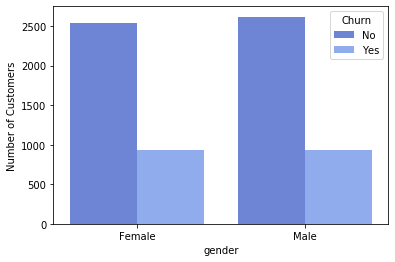

In [6]:
get_bar_plot("gender")

### Senior Citizen
What can we learn about the feature 'SeniorCitizen' and it's possible affect on 'churn'

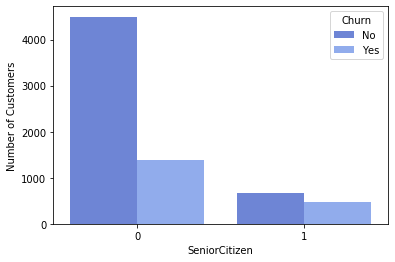

In [7]:
get_bar_plot("SeniorCitizen")

### Partner
What can we learn about the feature 'Partner' and it's possible affect on 'churn'

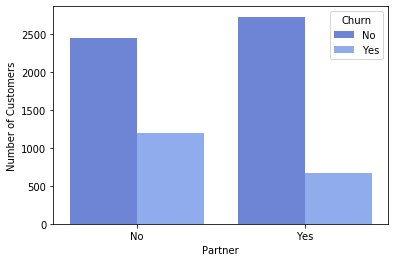

In [8]:
get_bar_plot("Partner")

### Dependents
What can we learn about the feature 'Dependents' and it's possible affect on 'churn'

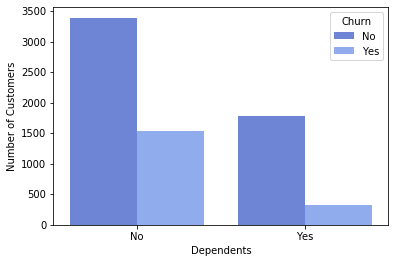

In [9]:
get_bar_plot("Dependents")

### Phone Service
What can we learn about the feature "PhoneService" and it's possible affect on 'churn'

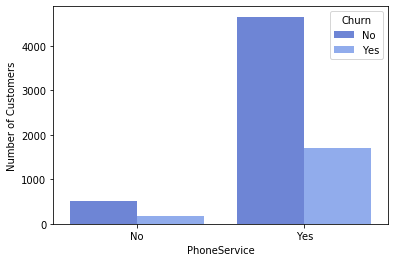

In [10]:
get_bar_plot("PhoneService")

### Multiple Lines ?
What can we learn about the feature "MultipleLines" and it's possible affect on 'churn'

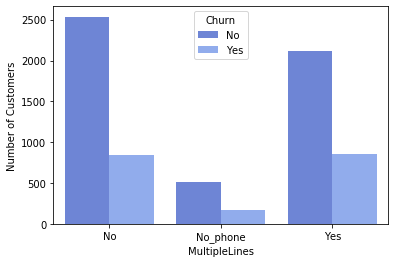

In [11]:
get_bar_plot("MultipleLines")

### Internet Service
What can we learn about the feature "InternetService" and it's possible affect on 'churn'

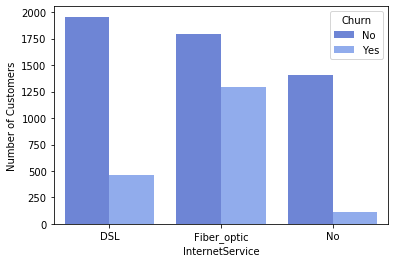

In [12]:
get_bar_plot("InternetService")

### Online Security ?
What can we learn about the feature "OnlineSecurity" and it's possible affect on 'churn'

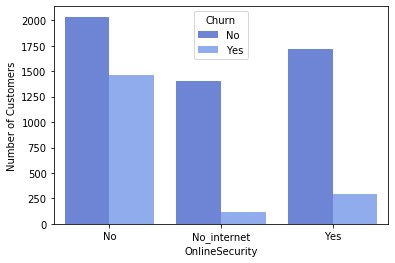

In [13]:
get_bar_plot("OnlineSecurity")

### Online Backup ? 
What can we learn about the feature "OnlineBackup" and it's possible affect on 'churn'

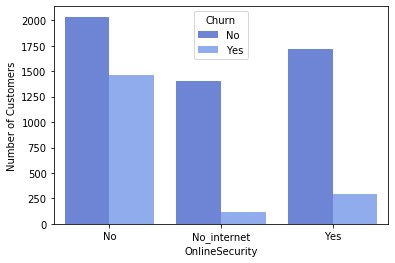

In [14]:
get_bar_plot("OnlineSecurity")

### Device Protection plan ? 
What can we learn about the feature "DeviceProtection" and it's possible affect on 'churn'

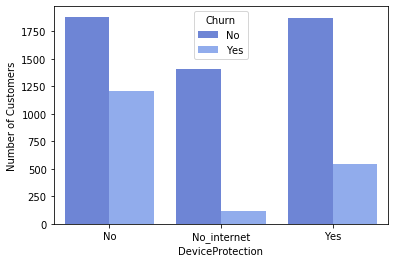

In [15]:
get_bar_plot("DeviceProtection")

### Technical Support ? 
What can we learn about the feature "TechSupport" and it's possible affect on 'churn'

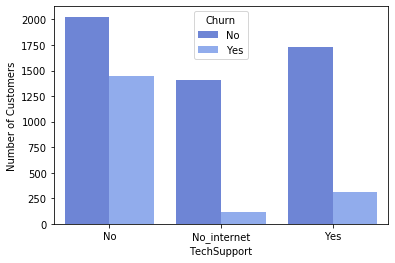

In [16]:
get_bar_plot("TechSupport")

### has streaming TV ?
What can we learn about the feature "StreamingTV" and it's possible affect on 'churn'

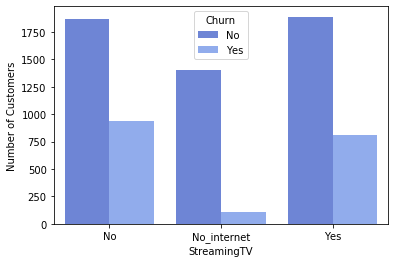

In [17]:
get_bar_plot("StreamingTV")

### has movie streaming ?
What can we learn about the feature "StreamingMovies" and it's possible affect on 'churn'

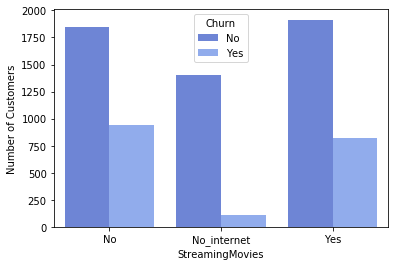

In [18]:
get_bar_plot("StreamingMovies")

### has a contract ?
What can we learn about the feature "Contract" and it's possible affect on 'churn'

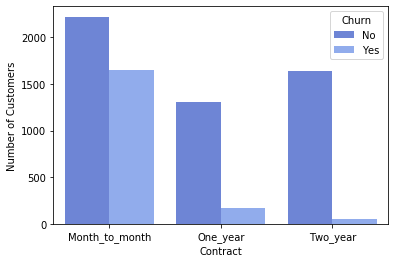

In [19]:
get_bar_plot("Contract")

### Paperless Billing ?
What can we learn about the feature "PaperlessBilling" and it's possible affect on 'churn'

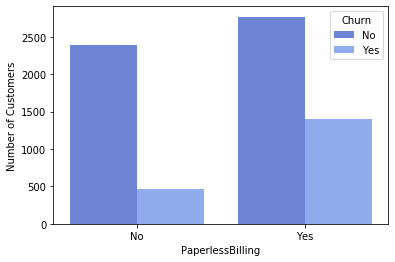

In [20]:
get_bar_plot("PaperlessBilling")

### Payment Method
What can we learn about the feature "PaymentMethod" and it's possible affect on 'churn'

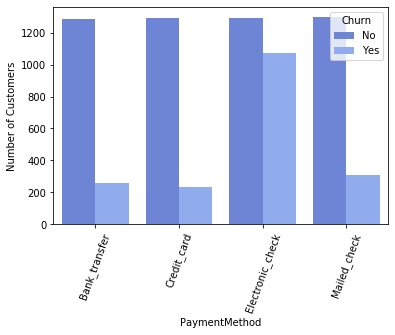

In [21]:
get_bar_plot("PaymentMethod")

## Explore numerical features

### tenure
What can we learn about the feature "tenure" and it's possible affect on 'churn'

### Monthly Charges
What can we learn about the feature "MonthlyCharges" and it's possible affect on 'churn'

### Total Charges
What can we learn about the feature "TotalCharges" and it's possible affect on 'churn'

In [22]:
# imports
#import plotly.graph_objs as go
#
##function  for histogram for customer attrition types
#def histogram(column) :
#    trace1 = go.Histogram(x  = churn[column],
#                          histnorm= "percent",
#                          name = "Churn Customers",
#                          marker = dict(line = dict(width = .5,
#                                                    color = "black"
#                                                    )
#                                        ),
#                         opacity = .9 
#                         ) 
#    
#    trace2 = go.Histogram(x  = not_churn[column],
#                          histnorm = "percent",
#                          name = "Non churn customers",
#                          marker = dict(line = dict(width = .5,
#                                              color = "black"
#                                             )
#                                 ),
#                          opacity = .9
#                         )
#    
#    data = [trace1,trace2]
#    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
#                            plot_bgcolor  = "rgb(243,243,243)",
#                            paper_bgcolor = "rgb(243,243,243)",
#                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
#                                             title = column,
#                                             zerolinewidth=1,
#                                             ticklen=5,
#                                             gridwidth=2
#                                            ),
#                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
#                                             title = "percent",
#                                             zerolinewidth=1,
#                                             ticklen=5,
#                                             gridwidth=2
#                                            ),
#                           )
#                      )
#    fig  = go.Figure(data=data,layout=layout)
#    
#    py.iplot(fig)
#
#for i in numerical:
#    histogram(i)

## correlation 

In [25]:
import plotly.graph_objs as go
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)